In [1]:
#Import libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
# Importing packages and dataset into the workspace
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
df = tf.keras.datasets.fashion_mnist
# spliting the data into train and testing part
(train_df,train_labl),(test_df,test_labl) = df.load_data()

In [3]:
#scaling the train data
train_df=train_df/np.float32(255)
#scaling test data
test_df = test_df/np.float32(255)


In [4]:
def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
train_images_mod = convert(train_df)
test_images_mod  = convert(test_df)

In [5]:
for i in range(10):
    print ('Train label ' + str(i) + ' count :' + str(len([j for j in train_labl if j==i])))
    print ('Test label ' + str(i) + ' count :' + str(len([j for j in test_labl if j==i])))

Train label 0 count :6000
Test label 0 count :1000
Train label 1 count :6000
Test label 1 count :1000
Train label 2 count :6000
Test label 2 count :1000
Train label 3 count :6000
Test label 3 count :1000
Train label 4 count :6000
Test label 4 count :1000
Train label 5 count :6000
Test label 5 count :1000
Train label 6 count :6000
Test label 6 count :1000
Train label 7 count :6000
Test label 7 count :1000
Train label 8 count :6000
Test label 8 count :1000
Train label 9 count :6000
Test label 9 count :1000


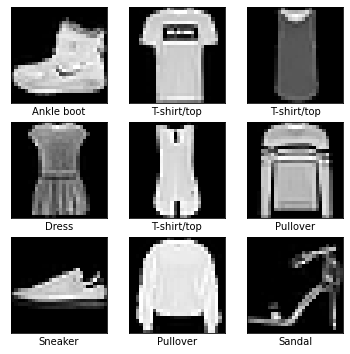

In [6]:
label_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(train_df[i])
    plt.xlabel(label_names[train_labl[i]])
plt.savefig('image_examples.jpg')
plt.show()

In [7]:
cnn_train       = train_images_mod.reshape(60000,28,28,1)
cnn_test        = test_images_mod.reshape(10000,28,28,1)
cnn_label_train = to_categorical(train_labl)
cnn_label_test  = to_categorical(test_labl)

In [8]:

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dense(10,activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

In [9]:
cnn_train, cnn_train_val, cnn_label_train, cnn_label_train_val = train_test_split(cnn_train,cnn_label_train, test_size = 0.16, random_state = 2019)

cnn_model_training = cnn_model.fit(cnn_train,cnn_label_train,batch_size=64,epochs=20,verbose=1,
                           validation_data=(cnn_train_val,cnn_label_train_val))

Epoch 1/20
788/788 [==============================] - 41s 51ms/step - loss: 0.4496 - accuracy: 0.8377 - val_loss: 0.3741 - val_accuracy: 0.8689
Epoch 2/20
788/788 [==============================] - 38s 48ms/step - loss: 0.3047 - accuracy: 0.8895 - val_loss: 0.3089 - val_accuracy: 0.8879
Epoch 3/20
788/788 [==============================] - 38s 48ms/step - loss: 0.2609 - accuracy: 0.9028 - val_loss: 0.2908 - val_accuracy: 0.8933
Epoch 4/20
788/788 [==============================] - 38s 48ms/step - loss: 0.2268 - accuracy: 0.9158 - val_loss: 0.2722 - val_accuracy: 0.8995
Epoch 5/20
788/788 [==============================] - 38s 48ms/step - loss: 0.2044 - accuracy: 0.9237 - val_loss: 0.2515 - val_accuracy: 0.9116
Epoch 6/20
788/788 [==============================] - 38s 48ms/step - loss: 0.1800 - accuracy: 0.9336 - val_loss: 0.2551 - val_accuracy: 0.9083
Epoch 7/20
788/788 [==============================] - 38s 48ms/step - loss: 0.1579 - accuracy: 0.9409 - val_loss: 0.2518 - val_accuracy:

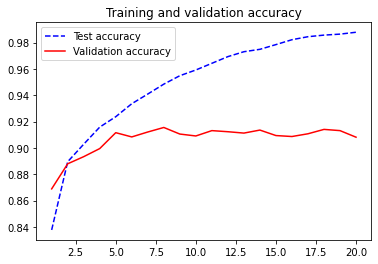

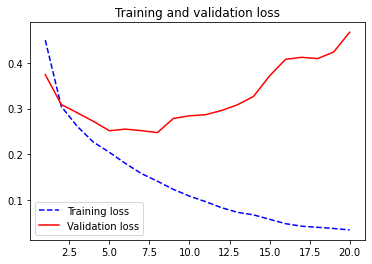

In [12]:
cnn_accuracy     = cnn_model_training.history['accuracy']
cnn_val_accuracy = cnn_model_training.history['val_accuracy']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (1,21)]

plt.plot(epochs, cnn_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

In [13]:
accuracy = cnn_model.evaluate(cnn_test,cnn_label_test,verbose=1)
print('The accuracy of CNN is equal to : ' + str(accuracy[1]))


313/313 [==============================] - 3s 8ms/step - loss: 0.5106 - accuracy: 0.9071
The accuracy of CNN is equal to : 0.9071000218391418
